In [3]:
from copy import deepcopy

from bp_base.factor_graph import FactorGraph
from configs.global_config_mapping import PROJECT_ROOT
from configs.loggers import Logger
from utils.path_utils import load_pickle
from utils.splitting import split_all_factors


In [4]:
import os
p:float = 0.6
file_path = os.path.join(PROJECT_ROOT,"configs","factor_graphs","factor-graph-cycle-4-random_intlow1,high1000.3-number0.pkl")
fg = load_pickle(file_path)
print(type(fg))


<class 'bp_base.factor_graph.FactorGraph'>


# util testing for loading and saving

### factor graph before the split:

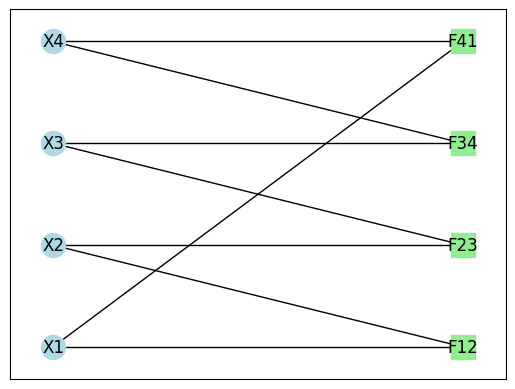

[Agent(x1, variable), Agent(x2, variable), Agent(x3, variable), Agent(x4, variable), FactorAgent: f12, FactorAgent: f23, FactorAgent: f34, FactorAgent: f41]


In [5]:
fg.visualize()
print(fg.G.nodes())

#### cost tables before split:

In [6]:
original_ct = deepcopy({factor.name:factor.cost_table for factor in fg.factors})
print(original_ct)

{'f12': array([[73, 51, 82, 92,  2],
       [ 8, 68, 30, 81, 36],
       [79, 75, 47,  8, 92],
       [44, 63, 39, 34, 76],
       [72, 27, 53, 82, 95]], dtype=int32), 'f23': array([[32, 30, 10, 63, 98],
       [43, 36, 87, 53, 56],
       [72, 51, 22, 22, 39],
       [ 1, 31, 97, 40, 27],
       [42, 76, 98, 16, 53]], dtype=int32), 'f34': array([[28, 70, 37, 69, 97],
       [10, 67, 38, 42, 19],
       [71, 43, 93, 85,  5],
       [73, 83, 98, 47, 16],
       [88, 13, 93, 91, 84]], dtype=int32), 'f41': array([[95, 35, 30, 45, 24],
       [29, 93, 46, 17,  2],
       [80, 43, 59, 93, 17],
       [58, 48, 92, 25, 10],
       [92, 76, 75, 69, 71]], dtype=int32)}


### factor graph after splitting

In [7]:
from utils.splitting import split_all_factors
split_all_factors(fg,p)


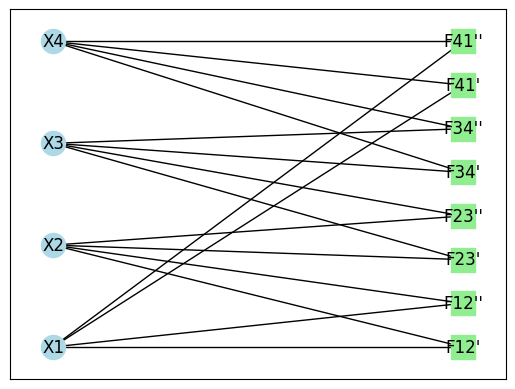

[Agent(x1, variable), Agent(x2, variable), Agent(x3, variable), Agent(x4, variable), FactorAgent: f12', FactorAgent: f12'', FactorAgent: f23', FactorAgent: f23'', FactorAgent: f34', FactorAgent: f34'', FactorAgent: f41', FactorAgent: f41'']


In [8]:
fg.visualize()
print(fg.G.nodes())

#### factors after splitting:

In [9]:
after_split ={factor.name:factor.cost_table for factor in fg.factors}
print(after_split)


{"f12'": array([[43.8, 30.6, 49.2, 55.2,  1.2],
       [ 4.8, 40.8, 18. , 48.6, 21.6],
       [47.4, 45. , 28.2,  4.8, 55.2],
       [26.4, 37.8, 23.4, 20.4, 45.6],
       [43.2, 16.2, 31.8, 49.2, 57. ]]), "f12''": array([[29.2, 20.4, 32.8, 36.8,  0.8],
       [ 3.2, 27.2, 12. , 32.4, 14.4],
       [31.6, 30. , 18.8,  3.2, 36.8],
       [17.6, 25.2, 15.6, 13.6, 30.4],
       [28.8, 10.8, 21.2, 32.8, 38. ]]), "f23'": array([[19.2, 18. ,  6. , 37.8, 58.8],
       [25.8, 21.6, 52.2, 31.8, 33.6],
       [43.2, 30.6, 13.2, 13.2, 23.4],
       [ 0.6, 18.6, 58.2, 24. , 16.2],
       [25.2, 45.6, 58.8,  9.6, 31.8]]), "f23''": array([[12.8, 12. ,  4. , 25.2, 39.2],
       [17.2, 14.4, 34.8, 21.2, 22.4],
       [28.8, 20.4,  8.8,  8.8, 15.6],
       [ 0.4, 12.4, 38.8, 16. , 10.8],
       [16.8, 30.4, 39.2,  6.4, 21.2]]), "f34'": array([[16.8, 42. , 22.2, 41.4, 58.2],
       [ 6. , 40.2, 22.8, 25.2, 11.4],
       [42.6, 25.8, 55.8, 51. ,  3. ],
       [43.8, 49.8, 58.8, 28.2,  9.6],
       [52.8,

### check that the split was good:

In [10]:
import numpy as np

is_split=np.testing.assert_allclose(
    original_ct["f12"],
    after_split["f12'"] + after_split["f12''"],
    rtol=1e-08,
    atol=1e-10,
    err_msg="The split columns do not recombine to the original values",
    verbose= True
)
print("split is good" if not is_split else "split is bad")



split is good
